# Tensorflow CNN

Importing library

In [ ]:
import tensorflow as tf
import numpy
import math
import os
import glob
import shutil
import matplotlib.pyplot as plt
import numpy as np


Image URL

In [ ]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"


Image Retrieval

In [ ]:
zip_file=tf.keras.utils.get_file(origin=_URL,fname="flower_photos.tgz",extract=True)

In [ ]:
base_dir=os.path.join(os.path.dirname(zip_file),'flower_photos/')

In [ ]:
ls

sample_data/


In [ ]:
classes=['daisy','dandelion','roses','sunflowers','tulips']

In [ ]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

In [ ]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [ ]:
train_dir,val_dir

('/root/.keras/datasets/flower_photos/train',
 '/root/.keras/datasets/flower_photos/val')

In [ ]:
total_train=0
for cl in classes:
  print(cl,len(os.listdir(os.path.join(train_dir,cl))))
  total_train+=len(os.listdir(os.path.join(train_dir,cl)))
print(total_train)

daisy 506
dandelion 718
roses 513
sunflowers 559
tulips 639
2935


In [ ]:
total_val=0
for cl in classes:
  print(cl,len(os.listdir(os.path.join(val_dir,cl))))
  total_val+=len(os.listdir(os.path.join(val_dir,cl)))
print(total_val)

daisy 127
dandelion 180
roses 128
sunflowers 140
tulips 160
735


DATA AUGMENTATION

Image Data Generator

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 150

Horizontal Flip

In [ ]:
train_image_generator=ImageDataGenerator(rescale=1.0/255,horizontal_flip=True)



In [ ]:
train_data_gen=train_image_generator.flow_from_directory(train_dir,
                                                         shuffle=True,
                                                         class_mode='categorical',
                                                         batch_size=BATCH_SIZE,
                                                         target_size=(IMG_SHAPE,IMG_SHAPE))


Found 2935 images belonging to 5 classes.


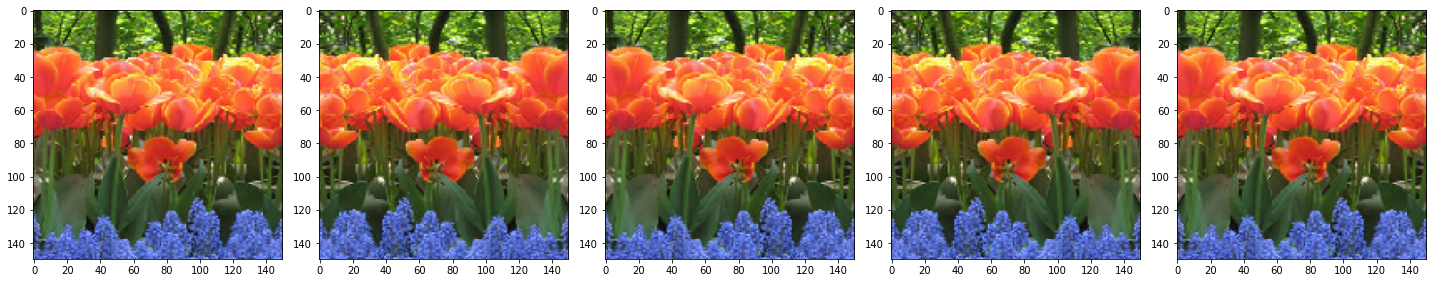

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Random Rotation 

In [ ]:
train_image_generator=ImageDataGenerator(rescale=1.0/255,rotation_range=45)

In [ ]:
train_data_gen=train_image_generator.flow_from_directory(train_dir,
                                                         shuffle=True,
                                                         class_mode='sparse',
                                                         batch_size=BATCH_SIZE,
                                                         target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


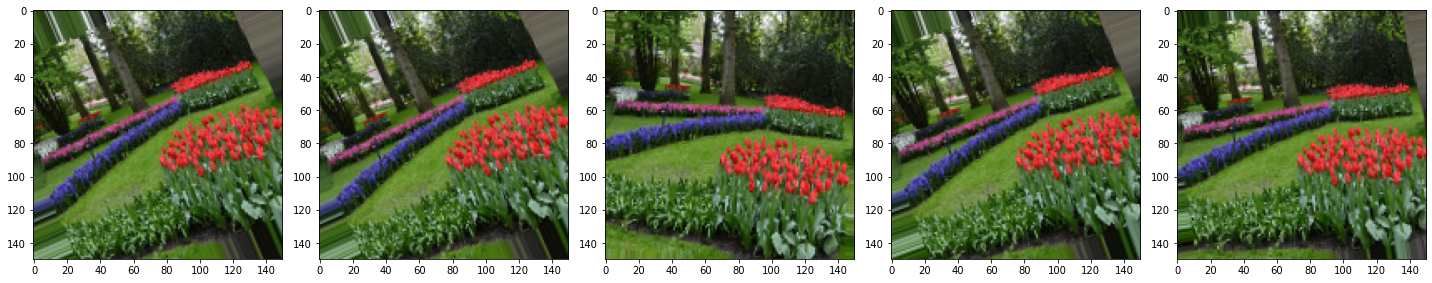

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Random zoom

In [ ]:
train_image_generator=ImageDataGenerator(rescale=1.0/255,zoom_range=0.5)

In [ ]:
train_data_gen=train_image_generator.flow_from_directory(train_dir,
                                                         shuffle=True,
                                                         class_mode='sparse',
                                                         batch_size=BATCH_SIZE,
                                                         target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


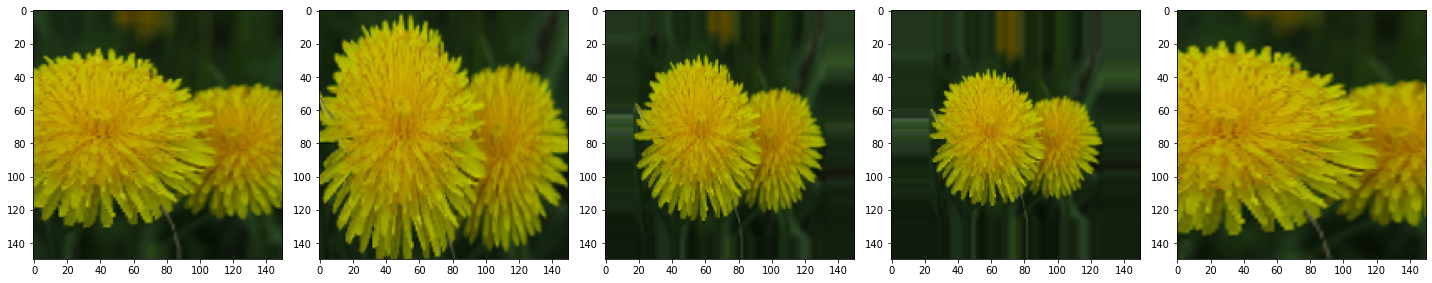

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Combining all augmentation

random 45 degree rotation

random zoom of up to 50%

random horizontal flip

width shift of 0.15

height shift of 0.15

In [ ]:
train_image_generator=ImageDataGenerator(rescale=1.0/255,zoom_range=0.5,horizontal_flip=True,rotation_range=45,width_shift_range=0.15,height_shift_range=0.15)

In [ ]:
train_data_gen=train_image_generator.flow_from_directory(train_dir,
                                                         shuffle=True,
                                                         class_mode='sparse',
                                                         batch_size=BATCH_SIZE,
                                                         target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2935 images belonging to 5 classes.


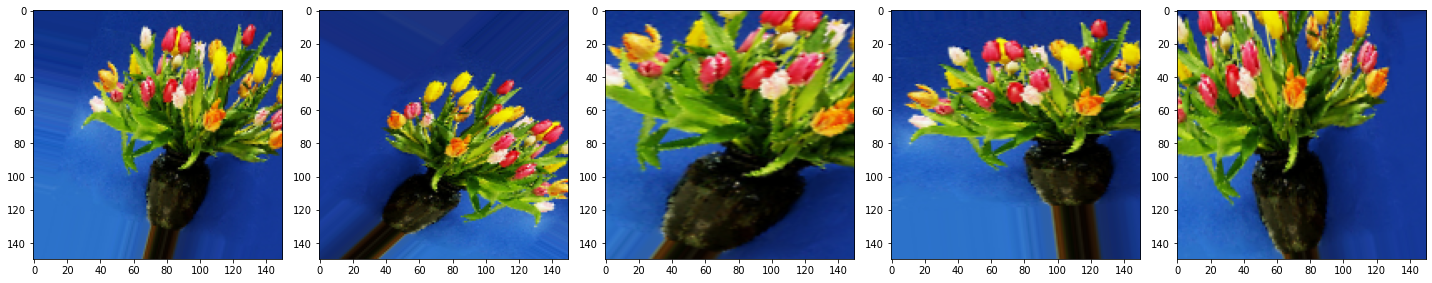

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
val_image_generator = ImageDataGenerator(rescale=1.0/255)

In [ ]:
val_data_gen=val_image_generator.flow_from_directory(val_dir,
                                                     shuffle=True,
                                                     class_mode='sparse',
                                                     batch_size=BATCH_SIZE,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE))

Found 735 images belonging to 5 classes.


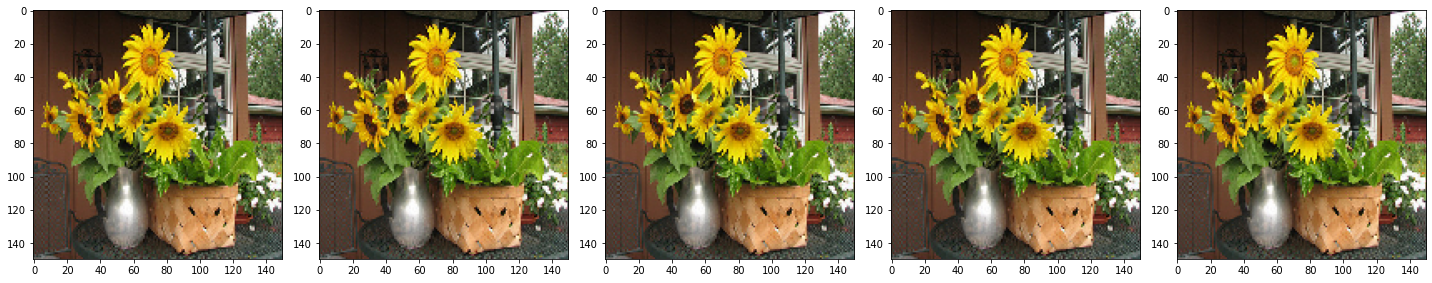

In [ ]:
augmented_images = [val_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPool2D(2,2),

  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512,activation='relu'),
  tf.keras.layers.Dense(5,activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=tf.keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 17, 17, 64)        0

In [ ]:
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath="best_weights.hdf5", 
                               monitor = 'val_acc',
                               verbose=1, 
                               save_best_only=True)

In [ ]:
epochs=100
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
30/30 [==============================] - 24s 722ms/step - loss: 2.3239 - accuracy: 0.2217 - val_loss: 1.4958 - val_accuracy: 0.3619
Epoch 2/100
30/30 [==============================] - 22s 726ms/step - loss: 1.3516 - accuracy: 0.4173 - val_loss: 1.2417 - val_accuracy: 0.4707
Epoch 3/100
30/30 [==============================] - 21s 718ms/step - loss: 1.1934 - accuracy: 0.4896 - val_loss: 1.0488 - val_accuracy: 0.5932
Epoch 4/100
30/30 [==============================] - 22s 737ms/step - loss: 1.0968 - accuracy: 0.5523 - val_loss: 1.0553 - val_accuracy: 0.5946
Epoch 5/100
30/30 [==============================] - 22s 723ms/step - loss: 1.0375 - accuracy: 0.5829 - val_loss: 1.0139 - val_accuracy: 0.6095
Epoch 6/100
30/30 [==============================] - 22s 732ms/step - loss: 1.0431 - accuracy: 0.5857 - val_loss: 1.0085 - val_accuracy: 0.6190
Epoch 7/100
30/30 [==============================] - 22s 725ms/step - loss: 0.9836 - accuracy: 0.6235 - val_loss: 0.9399 - val_accuracy:

In [ ]:
model.save('best_weights.hdf5')

In [ ]:
model.load_weights('best_weights.hdf5')

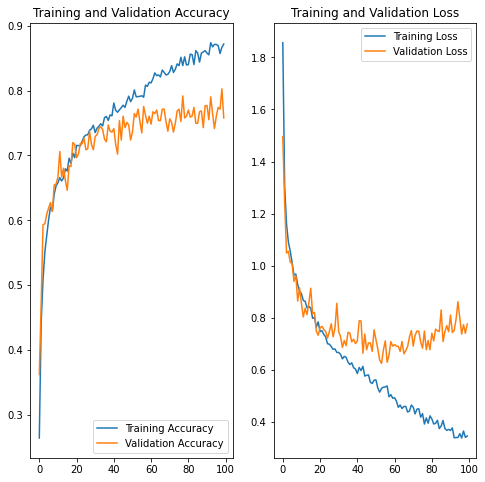

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()